##Tarea:
- ¿Cuál fue el mejor año para las ventas? ¿Cuánto se ganó ese año?
- ¿Cuál fue el mejor mes para las ventas? ¿Cuánto se ganó ese mes?
- ¿Qué ciudad tuvo el mayor número de ventas?
- ¿A qué hora debemos mostrar la publicidad para maximizar la probabilidad de que el cliente compre el producto?
- ¿Qué productos se venden juntos con más frecuencia?
- ¿Qué producto se vendió más? ¿Por qué crees que vendió más?

##¿Cuánta probabilidad?
- ¿Qué probabilidad hay de que las próximas personas soliciten el cable de carga USB-C?
- ¿Cuánta probabilidad de que la próxima gente ordene un iPhone?
- ¿Cuánta probabilidad de que la próxima gente ordene Google Phone?
- ¿Cuánta probabilidad de que otras personas ordenen auriculares con cable?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('all_data.csv')

In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [4]:
print(df.shape)
df.info()

(186850, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [5]:
miss = df.isnull().sum()
miss

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
print('El {:.2f}% de los valores son nulos'.format(100*miss.sum()/np.product(df.shape)))

El 0.29% de los valores son nulos


In [7]:
df[df.duplicated()].shape[0]

1162

In [8]:
print('El {:.2f}% de los valores son nulos'.format(100*np.product(df[df.duplicated()].shape)/np.product(df.shape)))

El 0.62% de los valores son nulos


In [9]:
df.drop(df[df['Order ID'].isnull()].index, axis=0, inplace=True)
df.drop(df[df.duplicated()].index, axis=0, inplace=True)
df.drop([211], axis=0, inplace=True)
df.reset_index(inplace=True, drop=True)

In [10]:
df['Order ID'] = pd.to_numeric(df['Order ID'])
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Order Date'] = pd.to_datetime(df['Order Date'])

df.dtypes

Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

Creacion nuevos features

In [73]:
df['Day'] = df['Order Date'].apply(lambda x: x.day)
df['Month'] = df['Order Date'].apply(lambda x: x.month)
df['Year'] = df['Order Date'].apply(lambda x: x.year)
df['Hour'] = df['Order Date'].apply(lambda x: x.hour)

df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1].strip(' '))
df['State'] = df['Purchase Address'].apply(lambda x: x.split(',')[2].split(' ')[1])
df['Postal code'] = df['Purchase Address'].apply(lambda x: x.split(',')[2].split(' ')[2])

df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [74]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day,Month,Year,Hour,City,State,Postal code,Sales
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",31,8,2019,22,Seattle,WA,98101,23.98
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",15,8,2019,15,Dallas,TX,75001,99.99
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",6,8,2019,14,Portland,OR,97035,700.00
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",29,8,2019,20,Los Angeles,CA,90001,7.68
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",15,8,2019,19,New York City,NY,10001,7.68


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text major ticklabel objects>)

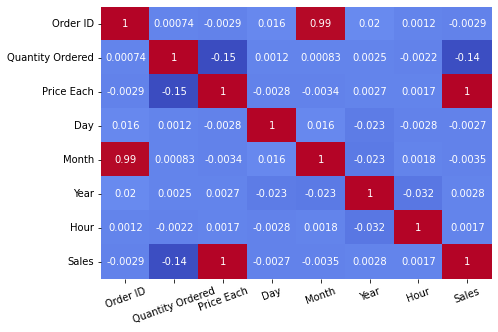

In [75]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True, annot_kws={'size':10}, cmap='coolwarm', cbar=False)
plt.xticks(rotation=20)

Text(0.5, 1.0, 'NÚMERO DE VENTAS POR MES')

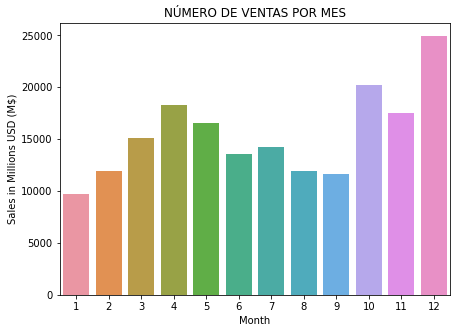

In [76]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Month')
plt.ylabel("Número de ventas")
plt.ylabel("Sales in Millions USD (M$)")
plt.title('NÚMERO DE VENTAS POR MES')

Text(0.5, 1.0, 'VALOR DE LAS VENTAS POR MES')

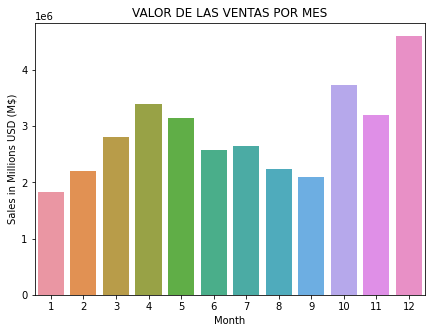

In [106]:
sales_per_month =df.groupby('Month').sum()['Sales']

plt.figure(figsize=(7,5))
sns.barplot(x=sales_per_month.index, y=sales_per_month)
plt.ylabel("Sales in Millions USD (M$)")
plt.title('VALOR DE LAS VENTAS POR MES')

In [78]:
df.nunique()

Order ID            178437
Product                 19
Quantity Ordered         9
Price Each              17
Order Date          142395
Purchase Address    140787
Day                     31
Month                   12
Year                     2
Hour                    24
City                     9
State                    8
Postal code             10
Sales                   54
dtype: int64

Text(0.5, 1.0, 'VALOR VENTAS POR CIUDAD')

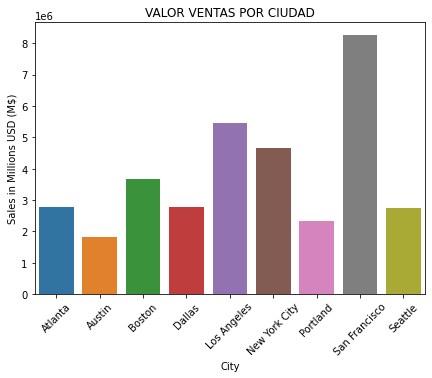

In [91]:
sales_per_city = df.groupby('City').sum()['Sales']

plt.figure(figsize=(7,5))
sns.barplot(x=sales_per_city.index, y=sales_per_city)
plt.ylabel("Sales in Millions USD (M$)")
plt.xticks(rotation=45)
plt.title('VALOR VENTAS POR CIUDAD')

In [122]:
cities = pd.read_csv('/content/cities.csv').set_index('City')
sales1= pd.DataFrame(sales_per_city).set_index([pd.Index(['Atlanta', 'Austin', 'Boston', 'Dallas', 'Los Angeles', 'New York',
       'Portland', 'San Francisco', 'Seattle'])])

In [140]:
map = pd.merge(cities, sales1, how='right', left_index=True, right_index=True, sort=True)
map=map[map['State']!='Maine'].reset_index().rename(columns={'index':'City'})

In [180]:
fig = px.scatter_mapbox(map, lat="lat", lon="lon", hover_name="City", hover_data=["State"], size="Sales",
                        color="Sales", color_continuous_scale=px.colors.sequential.haline, zoom=2, height=300, width=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show() 

In [186]:
a = df[df['Year']!=2020].groupby(['City', 'Month']).sum()['Sales']
sales2= pd.DataFrame(a).reset_index().set_index('City')

map2 = pd.merge(cities, sales2, how='right', left_index=True, right_index=True, sort=True)
map2=map2[map2['State']!='Maine'].reset_index().rename(columns={'index':'City'})

In [187]:
fig2 = px.scatter_mapbox(map2, lat="lat", lon="lon", hover_name="City", hover_data=["State"], size="Sales", animation_frame="Month",
                        color="Sales", color_continuous_scale=px.colors.sequential.haline, zoom=2, height=400, width=600)
fig2.update_layout(mapbox_style="open-street-map")
fig2.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig2.show() 

Text(0.5, 1.0, 'VENTAS POR HORA')

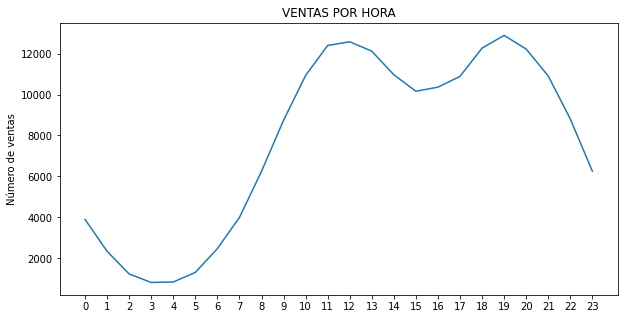

In [19]:
sales_per_hour = data=df.groupby('Hour').count()['Product']

plt.figure(figsize=(10,5))
plt.plot(sales_per_hour)
plt.xticks(ticks=sales_per_hour.index)
plt.ylabel("Número de ventas")
plt.title('VENTAS POR HORA')